# Estudi del mapa Logístic

Aquest notebook conté el càlcul i la representació numèrica del comportament del mapa logístic:
$$
x_{n+1} = r x_n (1 - x_n)
$$

Es calcula el **diagrama de bifurcació**, els **exponents de Lyapunov** en funció del paràmetre $r$, la **trajectòria** de les òrbites per a diferents valors de $r$, i finalment es representen dues **òrbites properes** per un valor de $r$ amb exponent de Lyapunov positiu, evidenciant-ne la divergència d'aquestes. 

Imports i configuració:

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

Definició del mapa logístic:

In [25]:
def logistic_map(x, r):
    return r * x * (1 - x)

Càlcul de l'exponent de Lyapunov per a un valor fix de $r$:

In [26]:
def lyapunov_exponent(r, x0=0.5, n_iter=1000, n_trans=100):
    x = x0
    lyap_sum = 0
    for i in range(n_iter + n_trans):
        x = logistic_map(x, r)
        if i >= n_trans:
            df = abs(r * (1 - 2 * x))
            if df == 0:
                return -np.inf
            lyap_sum += np.log(df)
    return lyap_sum / n_iter

Gràfic de trajectòria per un $r$ donat:

In [27]:
def plot_trajectory(r, x0=0.5, n=200):
    x_vals = [x0]
    for _ in range(n-1):
        x_vals.append(logistic_map(x_vals[-1], r))
    plt.figure(figsize=(8, 4))
    plt.plot(x_vals, marker='o', markersize=2, linestyle='-', color='tab:blue')
    plt.title(f"Trajectòria per r = {r}")
    plt.xlabel("Iteració")
    plt.ylabel("x")
    plt.grid(True)
    plt.show()


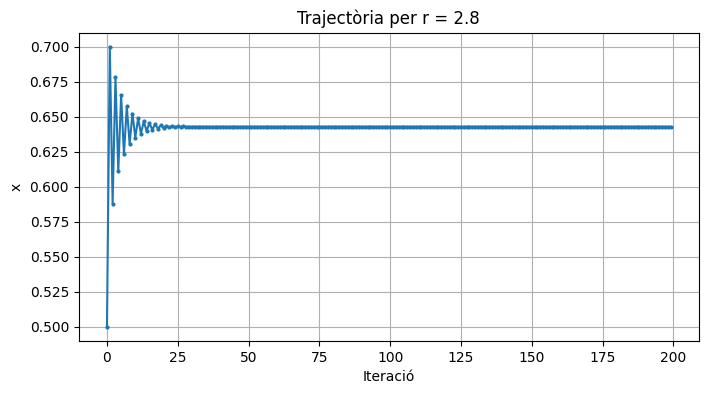

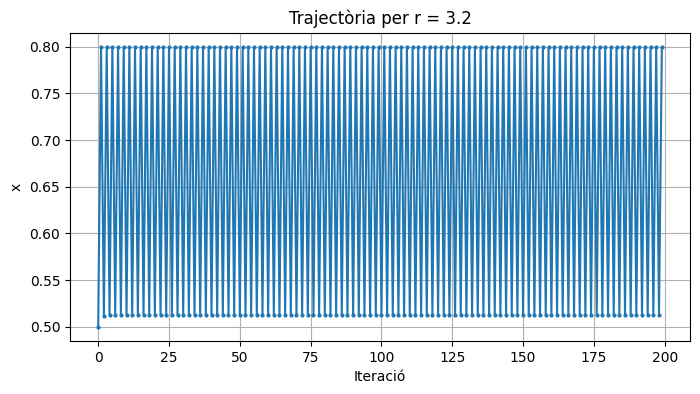

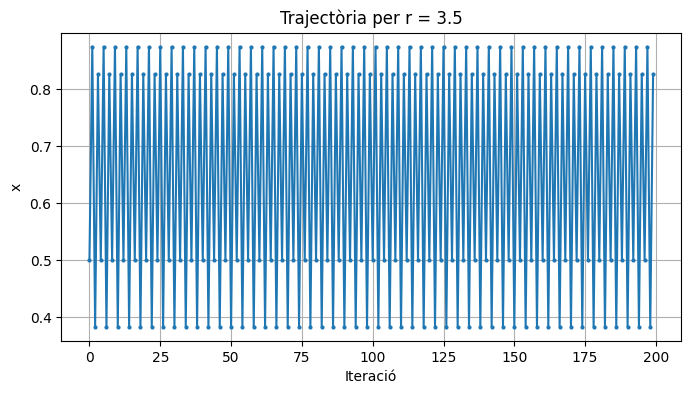

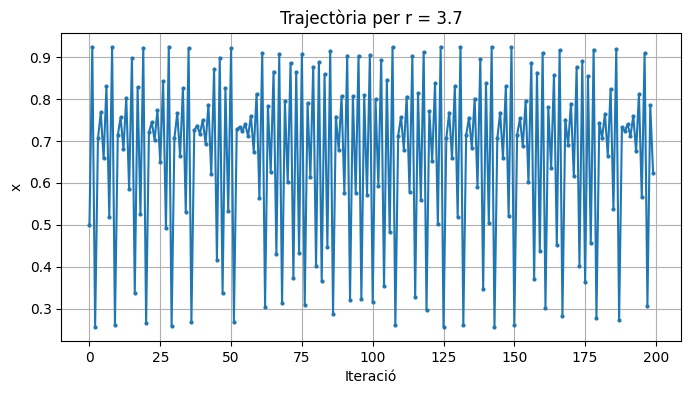

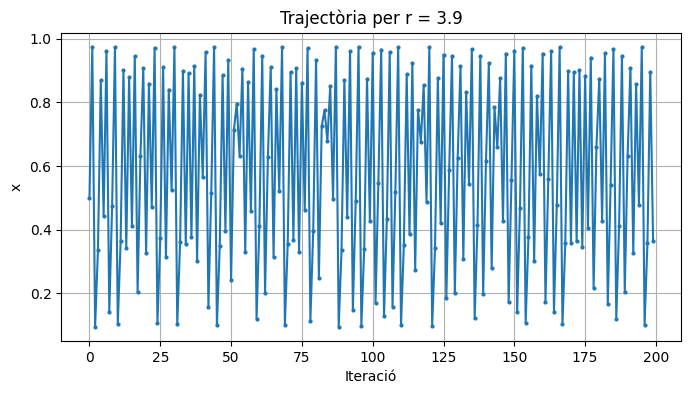

In [28]:
plot_trajectory(2.8)
plot_trajectory(3.2)
plot_trajectory(3.5)
plot_trajectory(3.7)
plot_trajectory(3.9)

Diagrama de bifurcació:

In [29]:
def bifurcation_diagram(r_min=2.5, r_max=4.0, n_r=800, n_iter=1000, n_trans=100):
    r_vals = np.linspace(r_min, r_max, n_r)
    x0 = 0.5
    xs = []

    for r in tqdm(r_vals):
        x = x0
        for _ in range(n_trans):
            x = logistic_map(x, r)
        for _ in range(n_iter):
            x = logistic_map(x, r)
            xs.append((r, x))

    r_list, x_list = zip(*xs)
    plt.figure(figsize=(10, 6))
    plt.plot(r_list, x_list, ls='', marker=',', color='black')
    plt.title("Diagrama de bifurcació del mapa logístic")
    plt.xlabel("r")
    plt.ylabel("x")
    plt.show()


  0%|          | 0/800 [00:00<?, ?it/s]

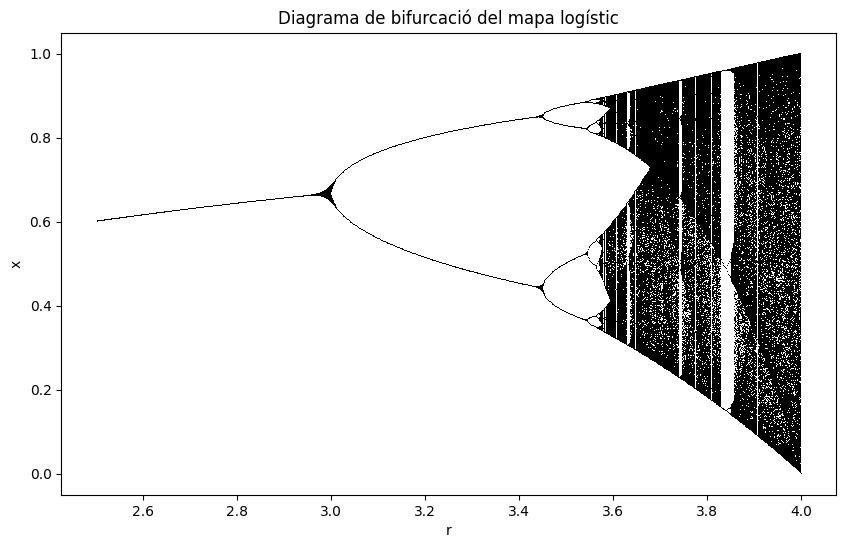

In [30]:
bifurcation_diagram()

Gràfic de l'exponent de Lyapunov segons $r$:

In [31]:
def lyapunov_vs_r(r_min=2.5, r_max=4.0, n_r=1000):
    r_vals = np.linspace(r_min, r_max, n_r)
    lyap_vals = []

    for r in tqdm(r_vals):
        l = lyapunov_exponent(r)
        lyap_vals.append(l)

    plt.figure(figsize=(10, 5))
    plt.plot(r_vals, lyap_vals, color='red', lw=1)
    plt.axhline(0, color='black', ls='--')
    plt.title("Exponent de Lyapunov en funció de r")
    plt.xlabel("r")
    plt.ylabel("λ(r)")
    plt.grid(True)
    plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

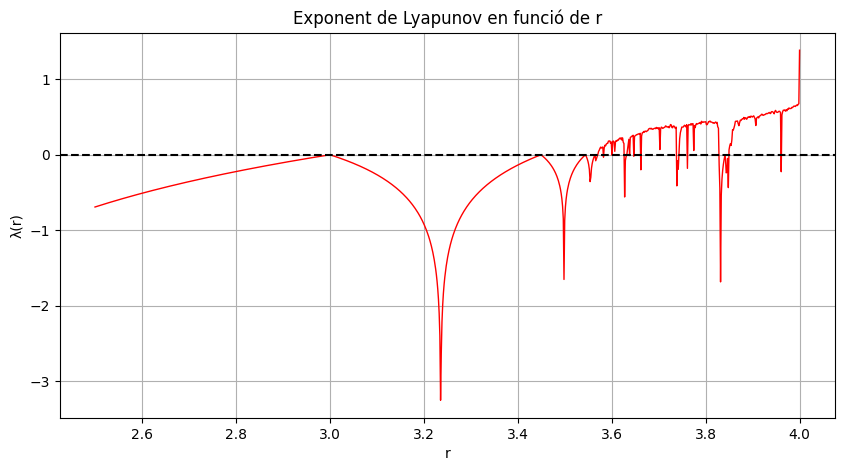

In [32]:
lyapunov_vs_r()

Taula per comparar els valors de $r$ amb el seu exponent de Lyapunov:

In [33]:
# Rang de valors de r
r_values = np.linspace(2.5, 4.0, 20)
lyap_values = [lyapunov_exponent(r) for r in r_values]

# Crear DataFrame
df = pd.DataFrame({'r': r_values, 'lyapunov': lyap_values})

print(df)

           r  lyapunov
0   2.500000 -0.693147
1   2.578947 -0.546544
2   2.657895 -0.418710
3   2.736842 -0.305382
4   2.815789 -0.203599
5   2.894737 -0.111226
6   2.973684 -0.026664
7   3.052632 -0.119952
8   3.131579 -0.392224
9   3.210526 -1.087653
10  3.289474 -0.710050
11  3.368421 -0.247625
12  3.447368 -0.005694
13  3.526316 -0.127293
14  3.605263 -0.081409
15  3.684211  0.345934
16  3.763158  0.404807
17  3.842105 -0.035989
18  3.921053  0.535287
19  4.000000  1.386294


Ara volem triar dos valors propers $x_n$ i $x_n+\varepsilon$ i veure com evoluciona la seva òrbita.

In [40]:
# Funicó per generar òrbites desde dos valors inicials propers
def generate_orbits(x0, x0_perturbed, r, steps):
    orbit_1 = np.empty(steps)
    orbit_2 = np.empty(steps)
    
    orbit_1[0] = x0
    orbit_2[0] = x0_perturbed
    
    for i in range(1, steps):
        orbit_1[i] = logistic_map(orbit_1[i-1], r)
        orbit_2[i] = logistic_map(orbit_2[i-1], r)
        
    return orbit_1, orbit_2


In [41]:
# Triem els paràmetres per calcular les òrbites
r = 3.9 # valor de r caòtic
x0 = 0.5 # condició inicial
epsilon = 1e-6 # petita pertorbació
steps = 100 # nombre d'iteracions

x0_perturbed = x0 + epsilon

orbit_1, orbit_2 = generate_orbits(x0, x0_perturbed, r, steps)

Representació de les dues òrbites i la seva separació:

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\cmarc\AppData\Local\Temp\ipykernel_19256\3624542051.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(orbit_2, label=f"Òrbita amb $x_0 + \epsilon$ = {x0_perturbed}", linestyle='--')


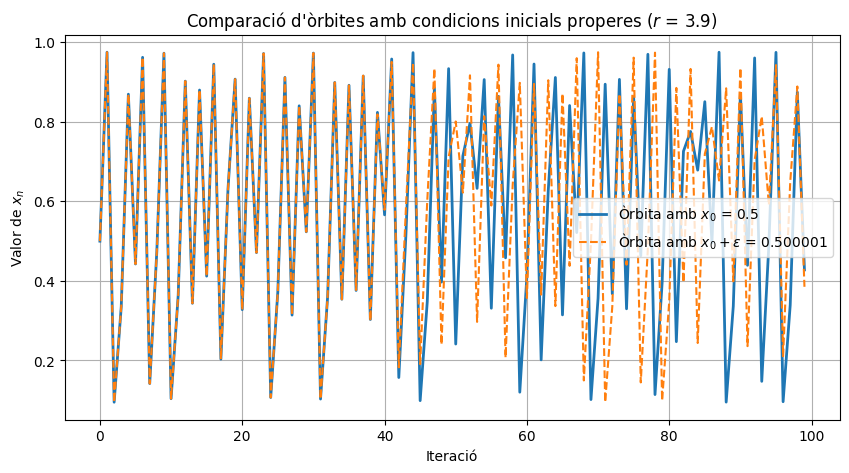

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(orbit_1, label=f"Òrbita amb $x_0$ = {x0}", linewidth=2)
plt.plot(orbit_2, label=f"Òrbita amb $x_0 + \epsilon$ = {x0_perturbed}", linestyle='--')
plt.title(f"Comparació d'òrbites amb condicions inicials properes ($r$ = {r})")
plt.xlabel("Iteració")
plt.ylabel("Valor de $x_n$")
plt.legend()
plt.grid(True)
plt.show()


Representació del creixement logarítmic de la distància.

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\cmarc\AppData\Local\Temp\ipykernel_19256\1309537824.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\ln(|\Delta x_n|)$")


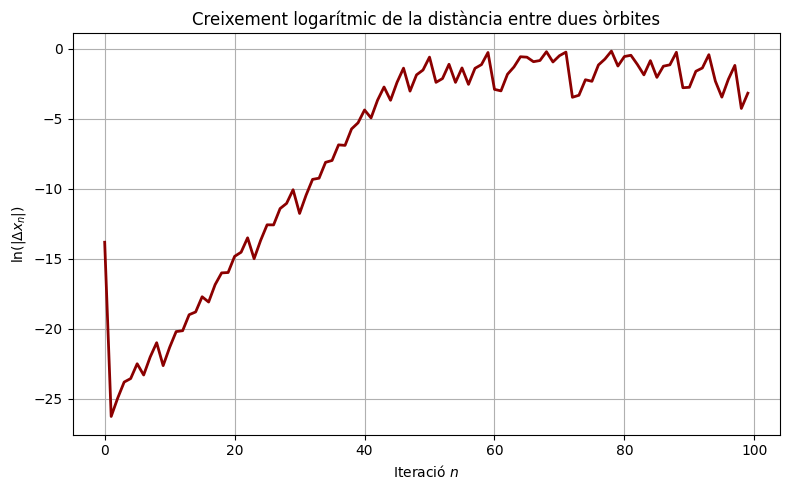

In [43]:
# Calcular la distància entre les dues òrbites
distancies = np.abs(np.array(orbit_1) - np.array(orbit_2))

# Representació en escala logarítmica
plt.figure(figsize=(8, 5))
plt.plot(np.log(distancies), color='darkred', linewidth=2)
plt.xlabel("Iteració $n$")
plt.ylabel("$\ln(|\Delta x_n|)$")
plt.title("Creixement logarítmic de la distància entre dues òrbites")
plt.grid(True)
plt.tight_layout()
plt.show()
